<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/ANN_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
plt.style.use('seaborn')
import seaborn as sns

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Packages for ANN

In [77]:
import tensorflow as tensorflow
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow import keras

In [78]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [79]:
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

1.0 read and understand the data set

In [80]:
df = pd.read_csv("/content/forestfires.csv")
df.shape

(517, 13)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [82]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


2.0 Data Processing

2.1 convert categorical to numerical for column size_category

In [83]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


In [84]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

2.2 data Processing for days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

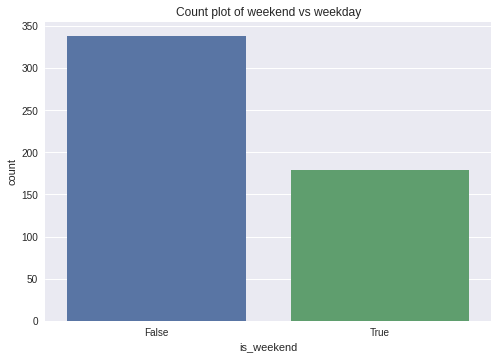

In [85]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat'))
# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})
# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

2.3 scalling the area and rain

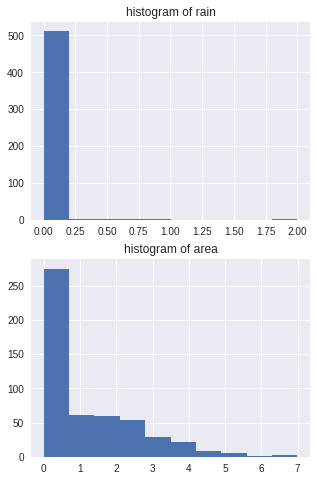

In [86]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

2.4 Train test and split




In [87]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

2.5 Feature Scalling : Standard Scaller

In [88]:
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.293766,-0.927776,0.672240,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.293766,-0.161993,0.672240,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-1.130796,0.603791,0.232536,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.712281,-0.161993,0.232536,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,0.124750,-0.161993,-2.405688,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923


3: Hyperparameter/ Experiment Results

3.1 Base Model

In [89]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=13, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 4s 36ms/step - loss: 3.4821 - accuracy: 0.7215 - val_loss: 3.2567 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 2.3307 - accuracy: 0.7215 - val_loss: 1.0647 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 1.6816 - accuracy: 0.7337 - val_loss: 0.5597 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0881 - accuracy: 0.7119 - val_loss: 0.5103 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.3795 - accuracy: 0.6925 - val_loss: 0.5007 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.2892 - accuracy: 0.6804 - val_loss: 0.4920 - val_accuracy: 0.7500
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.2654 - accuracy: 0.6973 - val_loss: 0.4831 - val_accuracy: 0.7500
Epoch 8/100


In [91]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.990, Valid: 0.962


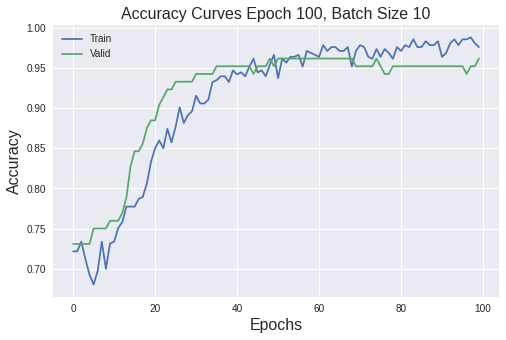

In [92]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

3.2: Batch Size: 4, 6, 10, 16, 32, 64, 128, 260

In [ ]:
# Fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
# Define Model
model = keras.Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
# Compile Model
model.compile(optimizer = 'adam',
metrics=['accuracy'],
loss = 'binary_crossentropy')
# Fit Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=n_batch)
# Plot Learning Curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('batch='+str(n_batch))
plt.legend()
# Create learning curves for different batch sizes
batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):
# Determine the Plot Number
plot_no = 420 + (i+1)
plt.subplot(plot_no)
# Fit model and plot learning curves for a batch size
fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
# Show learning curves
plt.show()

3.3 Batch Size = 6, Epochs = 20, 50, 100, 120, 150, 200, 300, 400

In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_epoch):
# define model
model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
# compile model
model.compile(optimizer ='adam', metrics=['accuracy'], loss = 'binary_crossentropy')
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=6)
# plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('epoch='+str(n_epoch))
plt.legend()
# Create learning curves for different batch sizes
epochs = [20, 50, 100, 120, 150, 200, 300, 400]
plt.figure(figsize=(10,15))
for i in range(len(batch_sizes)):
# Determine the Plot Number
plot_no = 420 + (i+1)
plt.subplot(plot_no)
# Fit model and plot learning curves for a batch size
fit_model(X_train, y_train, X_test, y_test, epochs[i])
# Show learning curves
plt.show()

3.4 Batch Size = 6, Early Stopping (Patience, Model Checkpoint)

In [ ]:
def init_model():
# define model
model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer ='adam',
metrics=['accuracy'],
loss = 'binary_crossentropy')
return model
# init model
model = init_model()
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
# model checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fitting model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, verbose=0, batch_size=6, callbacks=[es, mc])

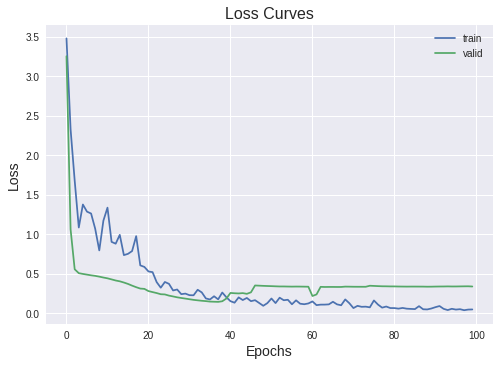

In [106]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

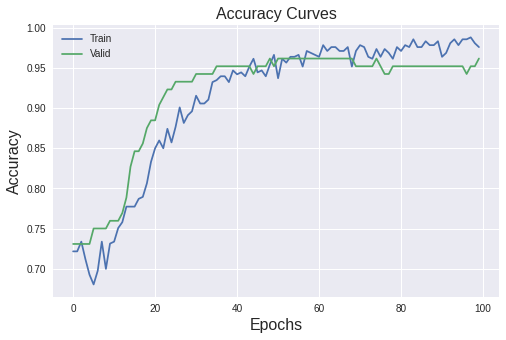

In [107]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [108]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.990, Valid: 0.962
